# Atividade 02 - Meteorologia

##### Alunas: Suelen Silva Oliveira, Vitoria Borges Bulhoes e Yasmin Lieh Sakamoto

#### Guararapes - Indústria de fabricação de painéis de MDF

##### Atividade referente ao capítulo 10.6.3 da AP42, que se refere a Painel de fibra de média densidade.
https://www.epa.gov/sites/default/files/2020-10/documents/c10s0603.pdf

Dados do estudo:

- Localização da indústria: Rod. Avelino Mandeli, s/n - KM 01 - Aeroporto, Caçador - SC, 89500-000.
- Estação meteorológica mais próxima:
- Sondagem mais próxima:

Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR

O objetivo desta atividade é a análise das condições meteorológicas para realizar o estudo de dispersão de poluentes atmosféricos. A análise será feita em três etapas:

### Analise da condição meteorológica de superfície (estação meteorológica)

#### Condições meteorológicas no ano de 2023:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
from windrose import WindroseAxes
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [2]:
#Os dados utilizados foram da estação metereológica de Florianópolis por ser a estação mais próxima ao empreendimento de interesse
# Selecionar arquivo para a análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath + '\\inputs\\meteosuperficie'
print (metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\UFSC\ENS410064\venv\Scripts
C:\UFSC\ENS410064\venv\Scripts\inputs\meteosuperficie
['metar.csv']


In [3]:
# Abrindo os arquivos metar
metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [4]:
# Criar uma coluna com DateTime dos dados

#Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day','hour']])
print(metSuperficie['datetime'])          

metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


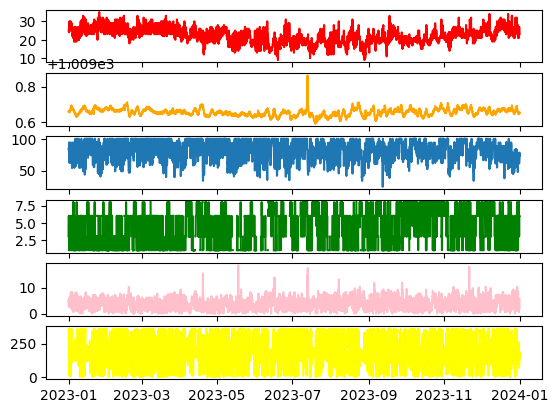

In [5]:
# Analisando os dados através de figuras
fig,ax = plt.subplots(6,sharex=True)
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color = 'red')
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color = 'orange')
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color = 'green')
ax[3].tick_params(axis='x', rotation=45) # -> ver como faz a rotação de eixo
ax[4].plot(metSuperficie['datetime'], metSuperficie['ws'], color = 'pink')
ax[5].plot(metSuperficie['datetime'], metSuperficie['wd'], color = 'yellow')

# metSuperficie['temp'].plot(ax=ax[0]) #uma forma de criar figura

##### Com esta figura podemos avaliar os dados, por exemplo no gráfico em amarelo (MENINAS AQUI NAO SERIA O LARANJA?), temos um dado bem fora do comum, o que indica uma medição errada, conseguimos retirar esse dado.

In [6]:
# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()

print(media_mensal)

# A partir disso podemos criar gráfico de barras por mês, gráfico de mudanças climáticas e etc.

                  day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2023-01-31  16.000000    1.0  2023.0  11.500000 NaN  203.930861  3.819839   
2023-02-28  14.493294    2.0  2023.0  11.500745 NaN  211.994368  3.374681   
2023-03-31  16.000000    3.0  2023.0  11.500000 NaN  212.134089  3.262525   
2023-04-30  15.500000    4.0  2023.0  11.500000 NaN  229.672012  3.304112   
2023-05-31  16.000000    5.0  2023.0  11.500000 NaN  248.224432  3.329711   
2023-06-30  15.500000    6.0  2023.0  11.500000 NaN  254.177680  3.727099   
2023-07-31  16.000000    7.0  2023.0  11.500000 NaN  244.600753  3.672328   
2023-08-31  16.000000    8.0  2023.0  11.500000 NaN  233.475650  4.191693   
2023-09-30  15.500000    9.0  2023.0  11.500000 NaN  230.095923  4.188015   
2023-10-31  16.000000   10.0  2023.0  11.500000 NaN  214.431250  3.726607   
2023-11-30  15.484006   11.0  2023.0  11.510431 NaN  205.173410  4.022299   

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8064\2282380692.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()


### Remoção dos dados discrepantes - Boxplot

array([<Axes: xlabel='temp'>, <Axes: xlabel='relh'>, <Axes: xlabel='p'>,
       <Axes: xlabel='cco'>, <Axes: xlabel='ws'>, <Axes: xlabel='wd'>],
      dtype=object)

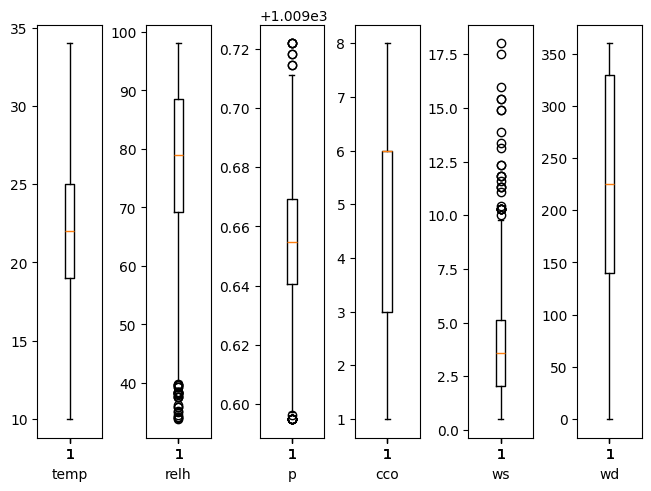

In [7]:
# Lista de colunas que serão analisadas 
analisar = ('temp', 'relh', 'p', 'cco', 'ws', 'wd') 

# Função para criar boxplot 
def boxplot(dados, colunas, percMin, percMax,):
    fig,ax = plt.subplots(1, len(colunas), sharex=True, constrained_layout=True)
    for i in range(len(colunas)):
        if colunas[i] in dados:
            if np.isnan(np.percentile(dados[colunas[i]], percMin) and np.percentile(dados[colunas[i]], percMax)) == False: 
                ax[i].boxplot(dados[colunas[i]]
                          [(dados[colunas[i]] < np.percentile(dados[colunas[i]], percMax)) & 
                          (dados[colunas[i]] > np.percentile(dados[colunas[i]], percMin))])
            else:
                ax[i].boxplot(dados[colunas[i]][~np.isnan(dados[colunas[i]])])
            ax[i].set_xlabel(colunas[i]) 
    return ax

# Dados brutos
boxplot(metSuperficie, analisar, 0, 100) 

In [8]:
# Identificando valores dos percentis 0.5 e 99
for i in range(len(analisar)):
    if (analisar[i] in metSuperficie):
        aux1 = np.percentile(metSuperficie[analisar[i]], 0.5)
        aux2 = np.percentile(metSuperficie[analisar[i]], 99)
        print('O percentil 0.5 da ' +str(analisar[i]) +' é '+str(aux1)) 
        print('O percentil 99 da '+str(analisar[i])+' é '+str(aux2)+'\n')

O percentil 0.5 da temp é 12.0
O percentil 99 da temp é 31.0

O percentil 0.5 da relh é 41.71
O percentil 99 da relh é 100.0

O percentil 0.5 da p é 1009.6045256529728
O percentil 99 da p é 1009.6967607391396

O percentil 0.5 da cco é nan
O percentil 99 da cco é nan

O percentil 0.5 da ws é 0.0
O percentil 99 da ws é 8.745548

O percentil 0.5 da wd é nan
O percentil 99 da wd é nan



array([<Axes: xlabel='temp'>, <Axes: xlabel='relh'>, <Axes: xlabel='p'>,
       <Axes: xlabel='cco'>, <Axes: xlabel='ws'>, <Axes: xlabel='wd'>],
      dtype=object)

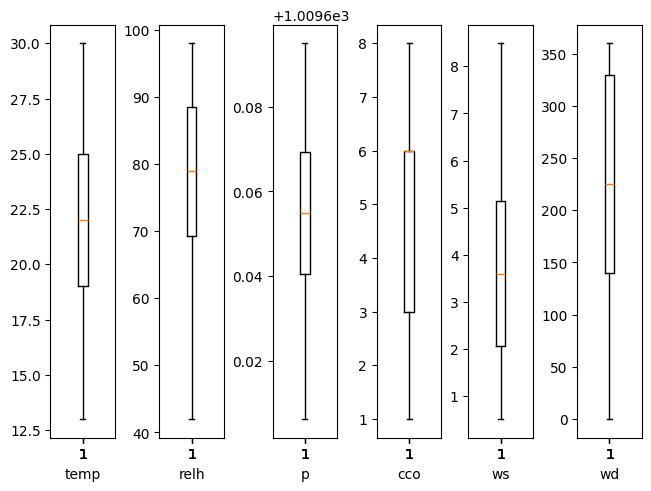

In [9]:
# Dados tratados
boxplot(metSuperficie, analisar, 0.5, 99) 

### Gráfico das médias mensais

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8064\3688127675.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()


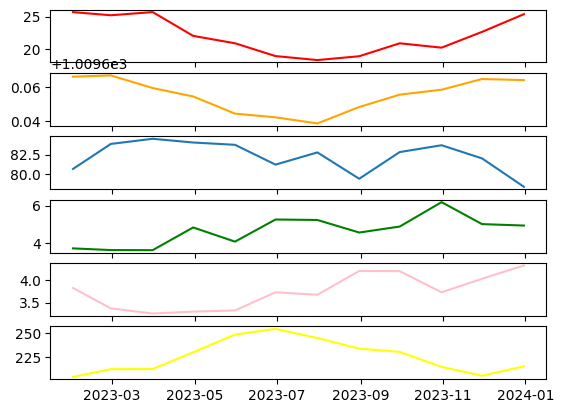

In [10]:
# Estatísticas dos dados
#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()

#Criando figuras após fazer a média mensal
fig,ax = plt.subplots(6,sharex=True)
ax[0].plot(media_mensal.index,media_mensal['temp'], color = 'red')
ax[1].plot(media_mensal.index,media_mensal['p'], color = 'orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'], color = 'green')
ax[4].plot(media_mensal.index,media_mensal['ws'], color = 'pink')
ax[5].plot(media_mensal.index,media_mensal['wd'], color = 'yellow')

ax[3].tick_params(axis='x', rotation=45) # -> ver como faz a rotação de eixo

# A partir disso podemos criar gráfico de barras por mês, gráfico de mudanças climáticas e etc.

### Gráfico das médias mensais representando as mínimas e máximas mensais

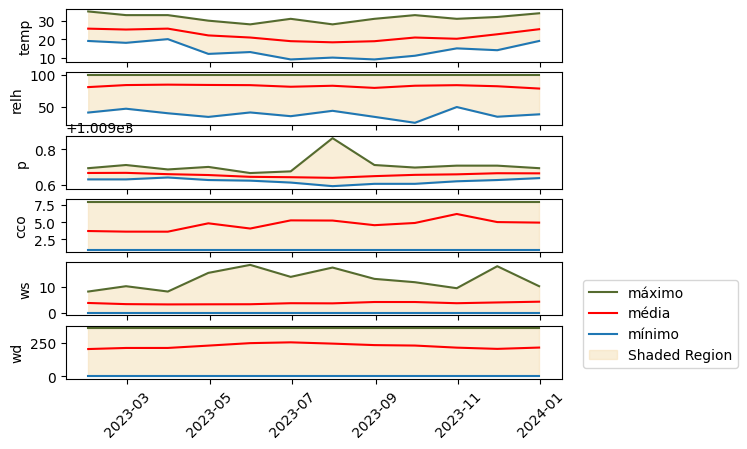

In [11]:
# Estatísticas 
min_mensal = metSuperficie.resample('ME').min()
max_mensal = metSuperficie.resample('ME').max()

# Figuras da série temporal 
fig,ax = plt.subplots(len(analisar),sharex=True)
for i in range(len(analisar)):
    if analisar[i] in metSuperficie:
        ax[i].plot(media_mensal.index, max_mensal[analisar[i]], color='darkolivegreen', label='máximo')
        ax[i].plot(media_mensal.index, media_mensal[analisar[i]],color='red', label='média')
        ax[i].plot(media_mensal.index, min_mensal[analisar[i]], label='mínimo')
        ax[i].fill_between(media_mensal.index, min_mensal[analisar[i]], max_mensal[analisar[i]], color='wheat', alpha=0.5, label='Shaded Region')
        ax[i].set_ylabel(analisar[i]) 
ax[-1].tick_params(axis='x', rotation=45)
plt.legend(bbox_to_anchor=(1.03, 2)) 
plt.show() 

### Rosa dos ventos

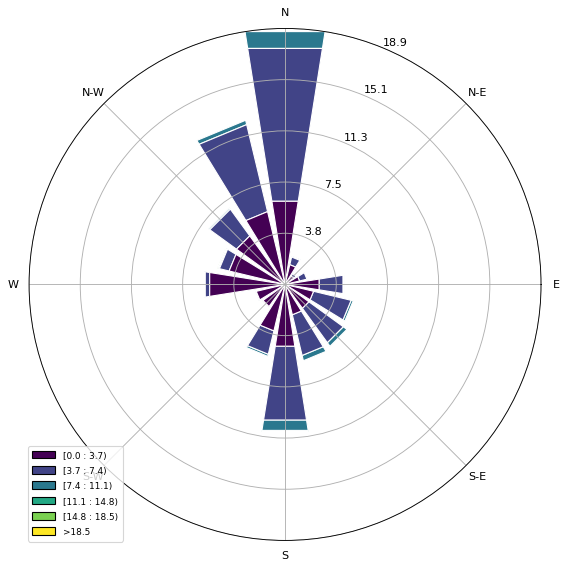

In [12]:
# Criando minha rosa dos ventos
ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

##### Discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

## 2 - Análise do perfil de temperatura - Pacote Siphon

##### Os dados analisados dados de 0 e 12 horas durante 10 dias, sendo 5 no verão e 5 no inverno.

In [13]:
# Função para analisar o perfil da atmosférica

def perfil(temp, alt, dia):
    deltaT = np.diff(temp)
    deltaZ = np.diff(alt)
    dTdZ = (deltaT/deltaZ)*100 # Gradiente de temperatura; a cada 100 m    
    fig,ax = plt.subplots() # Criando figura do perfil de temperatura 
    ax.plot(temp, alt, lw=2, label='Estável')  
    
    primeira_iteracao = True # variável auxiliar para evitar rótulos repetidos na legenda 
    for i in range(len(dTdZ)):
        if dTdZ[i] > 0: # inversão 
            if primeira_iteracao:
                ax.plot(temp[i], alt[i], color='blue', marker='X', label='Inversão')
                primeira_iteracao = False
            else:
                ax.plot(temp[i], alt[i], color='blue', marker='X')  

    primeira_iteracao = True
    for i in range(len(dTdZ)):
        if -1 < dTdZ[i] < -0.98: # neutro 
            if primeira_iteracao:
                ax.plot(temp[i], alt[i], color='black', marker='o', label='Neutro')
                primeira_iteracao = False
            else:
                ax.plot(temp[i], alt[i], color='black', marker='o')
    
    primeira_iteracao = True
    for i in range(len(dTdZ)):
        if dTdZ[i] < -1: # instável
            if primeira_iteracao:
                ax.plot(temp[i], alt[i], color='red', marker='s', label='Instável')
                primeira_iteracao = False
            else:
                ax.plot(temp[i], alt[i], color='red', marker='s')
                                         
    ax.set_title('Perfil de temperatura '+ dia)
    ax.set_xlabel('Temperatura (°C)')
    ax.set_ylabel('Altura (m)') 
    ax.legend()
    return ax

In [14]:
# Datas para análise no inverno (10-15/07/2023)
date = pd.date_range(start='2023-07-10', end='2023-07-15', freq='12h')
# local da análise
station = 'SBFL' 

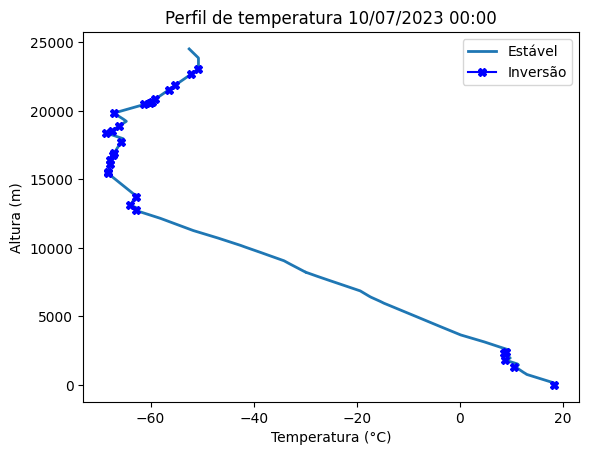

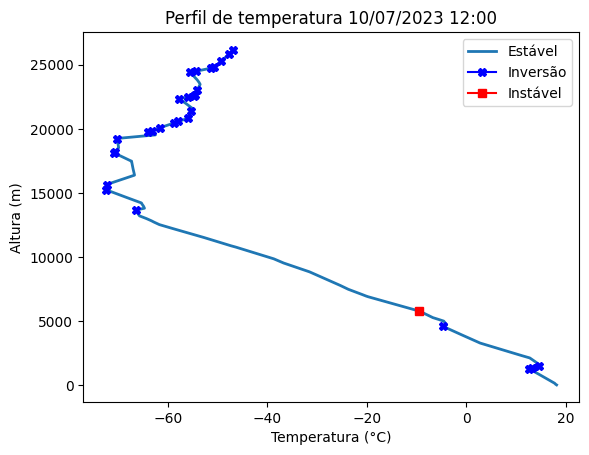

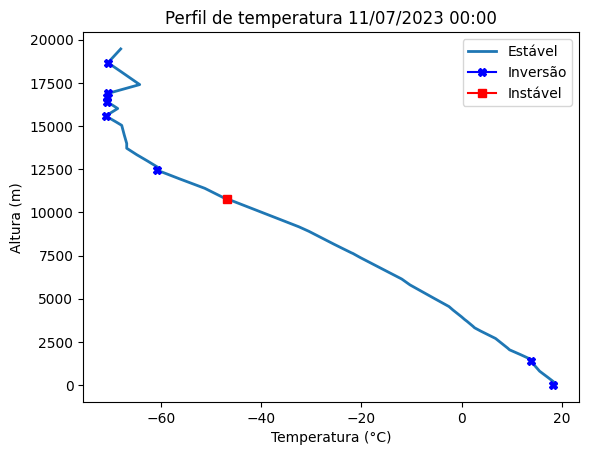

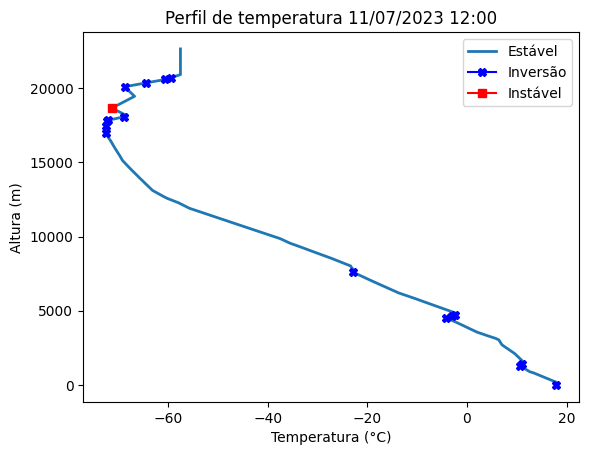

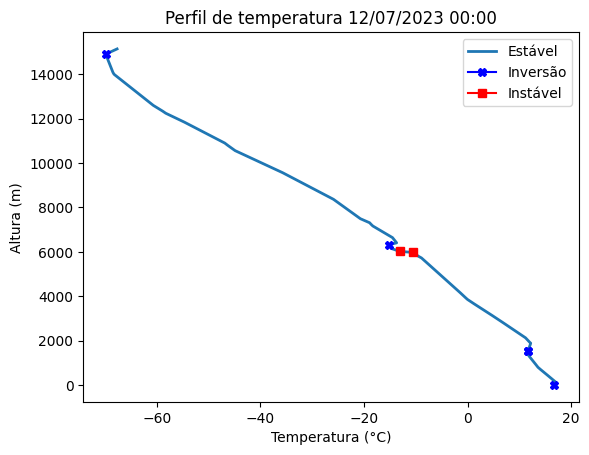

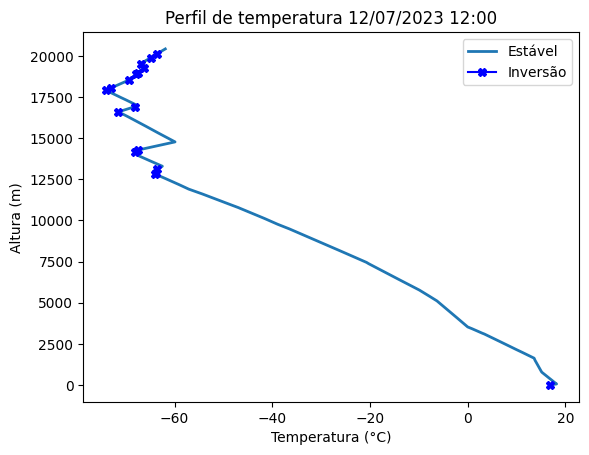

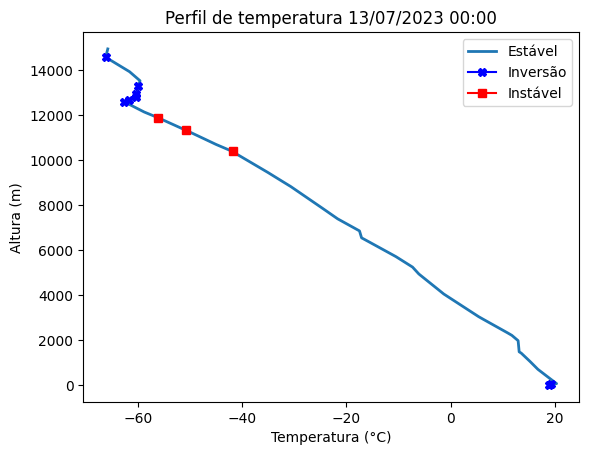

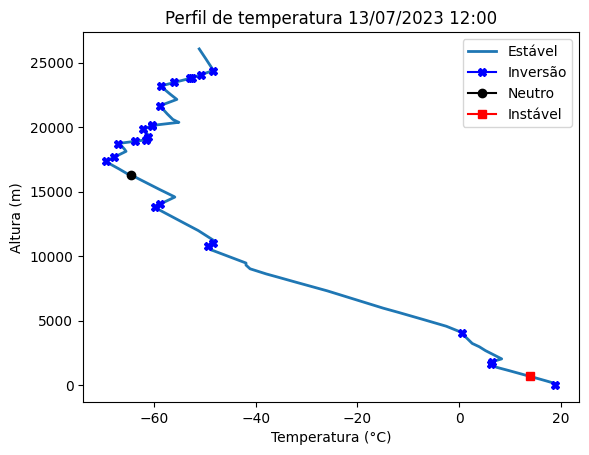

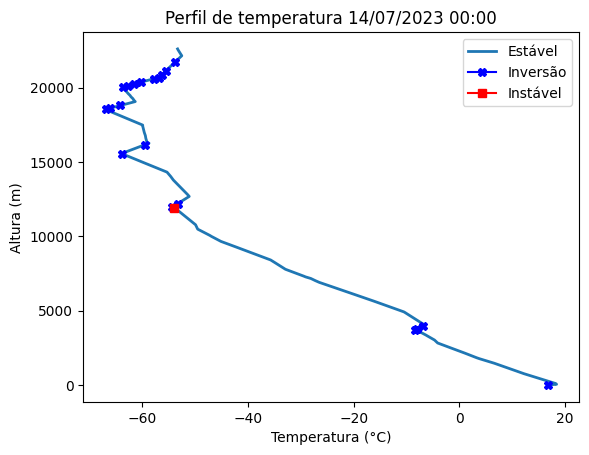

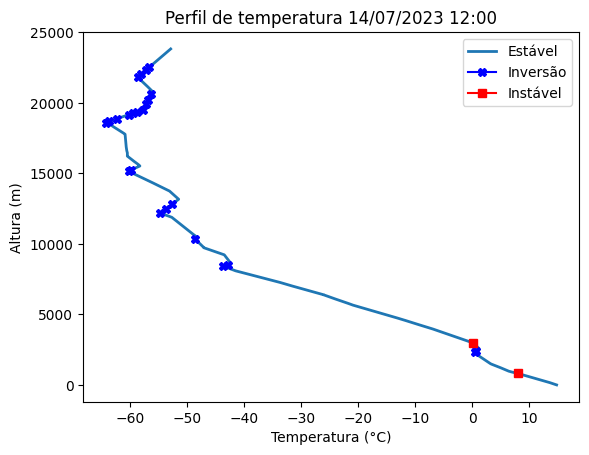

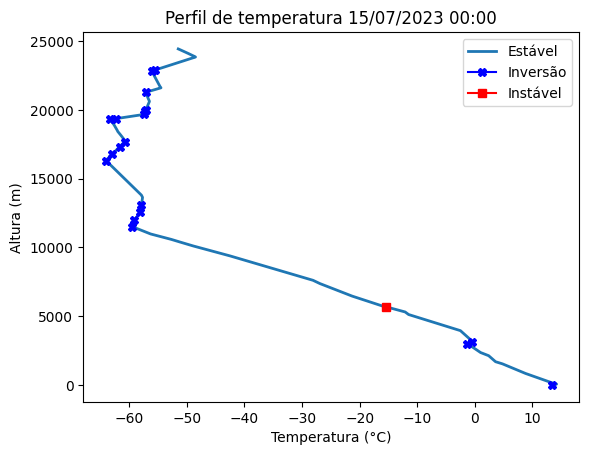

In [15]:
for i in range(len(date)):
    df = WyomingUpperAir.request_data(date[i], station) # Extraindo os dados
    perfil(df['temperature'], df['height'], date[i].strftime('%d/%m/%Y %H:%M'))

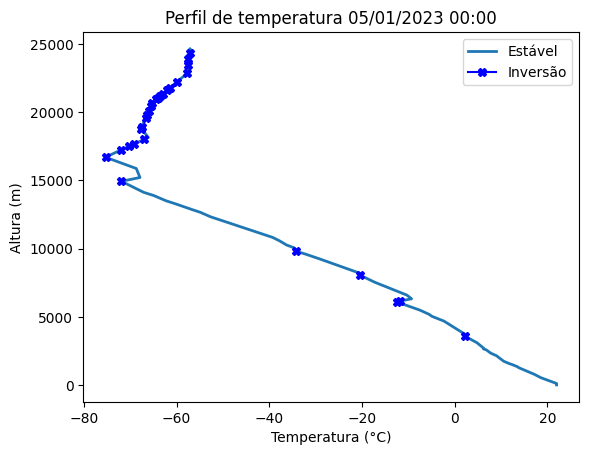

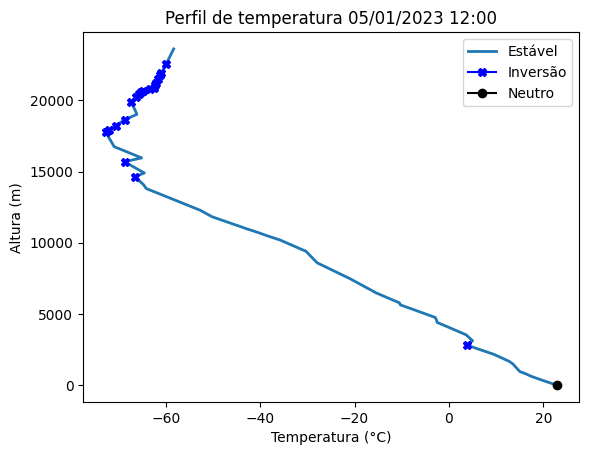

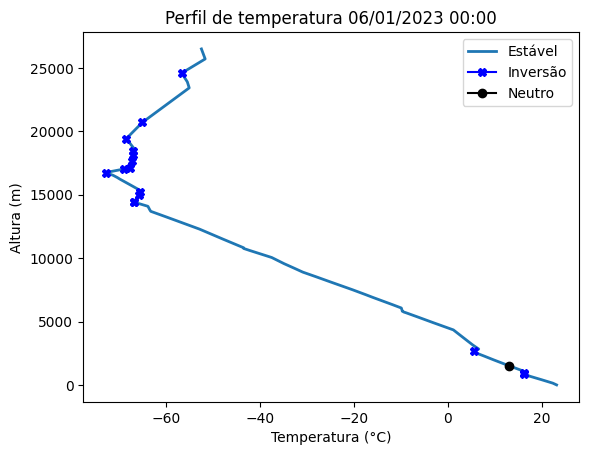

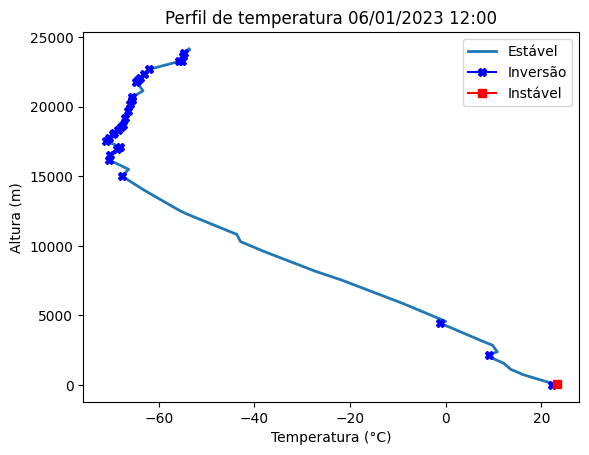

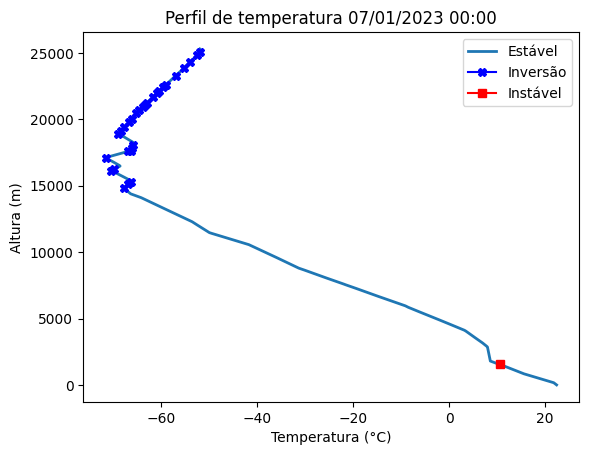

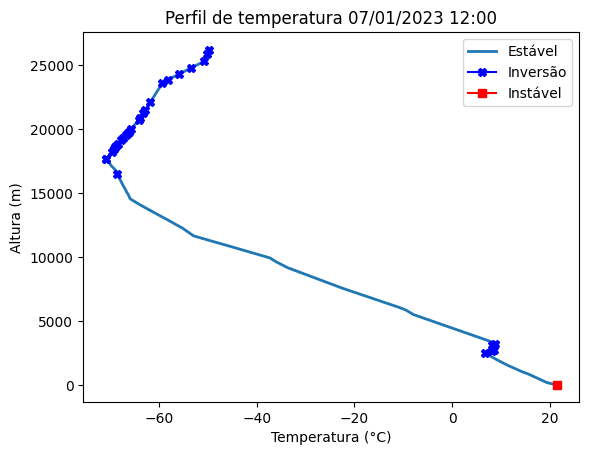

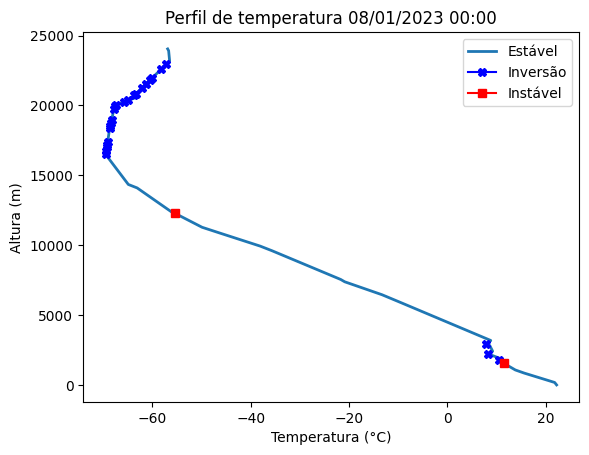

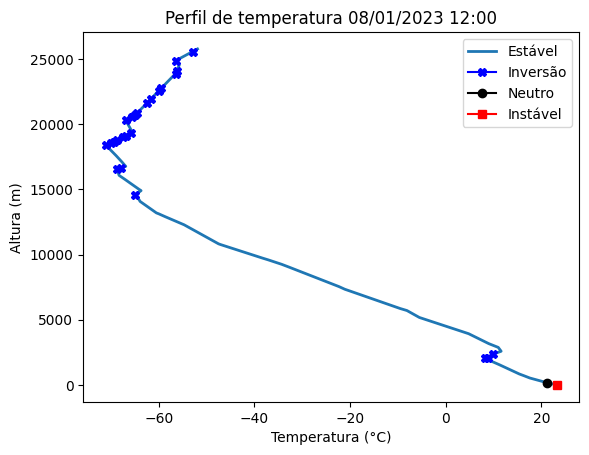

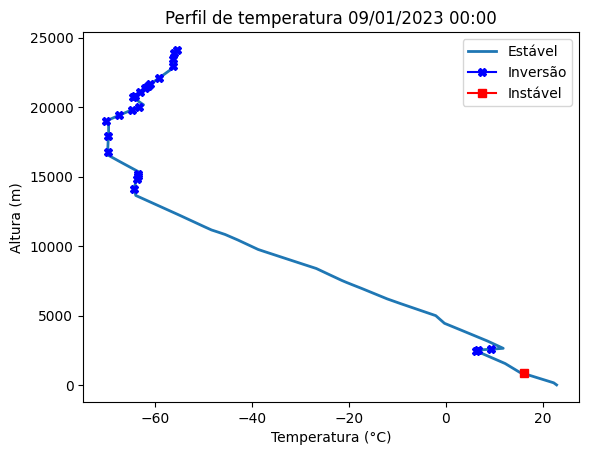

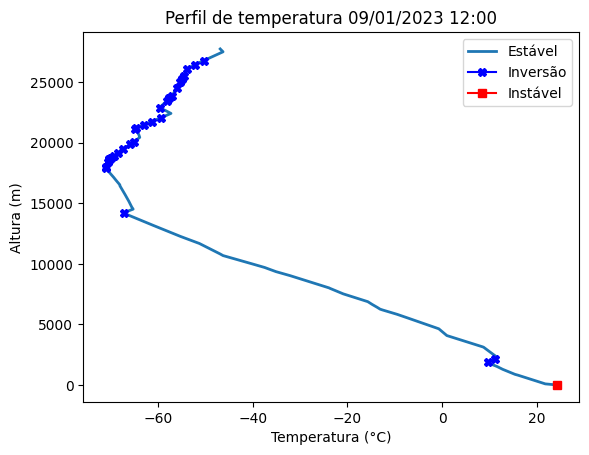

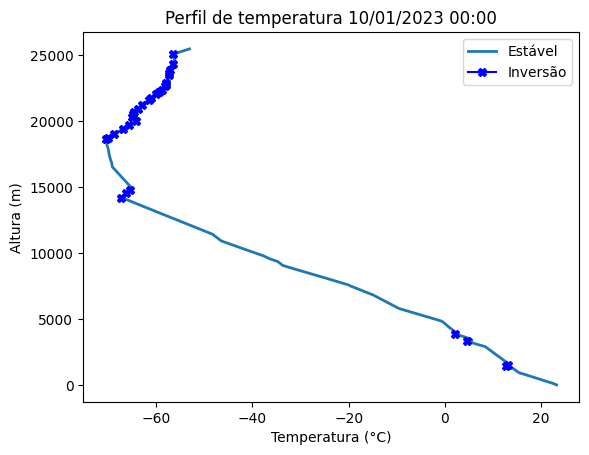

In [16]:
# Datas para análise no verão (05-10/01/2023)
date = pd.date_range(start='2023-01-05', end='2023-01-10', freq='12h')
for i in range(len(date)):
    df = WyomingUpperAir.request_data(date[i], station) # Extraindo os dados
    perfil(df['temperature'], df['height'], date[i].strftime('%d/%m/%Y %H:%M'))

##### Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

### Análise de dados no espaço

##### Analisando os dados de temperatura na região de estudo utilizando previsão meteorológica

In [17]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np
from siphon.catalog import TDSCatalog

def plot_temperature_forecast(date_time):
    best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                          'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
    best_ds = best_gfs.datasets[0]
    ncss = best_ds.subset()

    query = ncss.query()
    query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(date_time)
    query.accept('netcdf4')
    query.variables('Temperature_surface')

    data = ncss.get_data(query)

    temp_var = data.variables['Temperature_surface'] # Podem analisar outras variáveis.
    time_name = temp_var.coordinates.split()[1]
    time_var = data.variables[time_name]
    lat_var = data.variables['latitude']
    lon_var = data.variables['longitude']

    temp_vals = temp_var[:].squeeze()
    lat_vals = lat_var[:].squeeze()
    lon_vals = lon_var[:].squeeze()

    time_val = num2date(time_var[:].squeeze(), time_var.units)
    temp_vals = temp_vals * 1.8 - 459.67

    lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

    fig = plt.figure(figsize=(15, 12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-55., -47., -28, -25])
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)
    cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                     cmap='coolwarm')
    plt.colorbar(cf, ax=ax, fraction=0.032)
    ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
                 fontsize=20)
    ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
            alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

    plt.show()

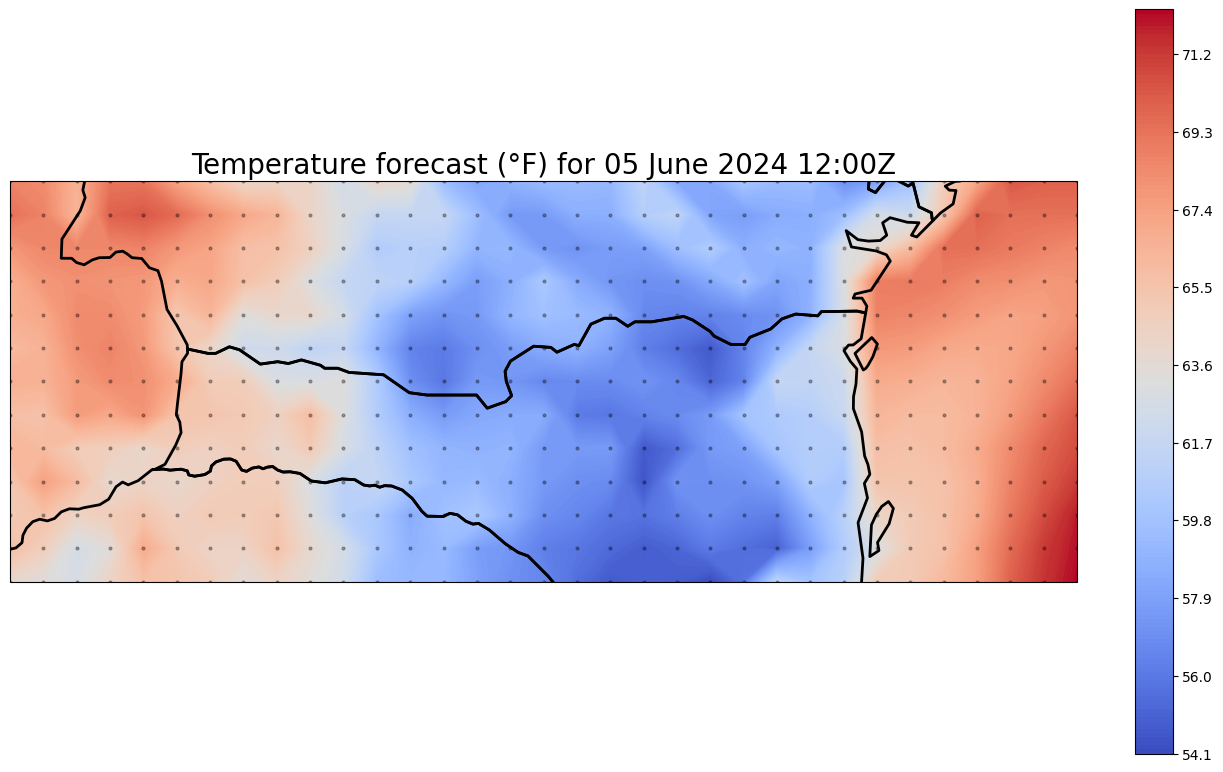

In [18]:
# Defina a data e hora desejadas
data_e_hora = datetime(2024, 6, 5, 12)  # Por exemplo, 6 de junho de 2024 às 12:00

# Chame a função com a data e hora desejadas
plot_temperature_forecast(data_e_hora)

In [19]:
# Abrindo os arquivos metar
file_path = r'C:\UFSC\ENS410064\venv\Scripts\inputs\aermod\METEO1.csv'
df = pd.read_csv(file_path)
print (df)
# Selecionar a primeira linha de todas as colunas
primeira_linha = df.iloc[0]
# Exibir a primeira linha de todas as colunas
print(primeira_linha)

      year  month  day  Julian day  hour sensible heat flux (W/m2 )  \
0       23      1    1           1     1                   .-34..5.   
1       23      1    1           1     2                   .-38..2.   
2       23      1    1           1     3                   .-43..9.   
3       23      1    1           1     4                   .-49..4.   
4       23      1    1           1     5                   .-18..5.   
...    ...    ...  ...         ...   ...                        ...   
8779    24      1    1           1    20                       -999   
8780    24      1    1           1    21                       -999   
8781    24      1    1           1    22                       -999   
8782    24      1    1           1    23                       -999   
8783    24      1    1           1    24                       -999   

     surface friction velocity (m/s)  convective velocity scale (m/s)  \
0                            .0..394.                              -9   
1

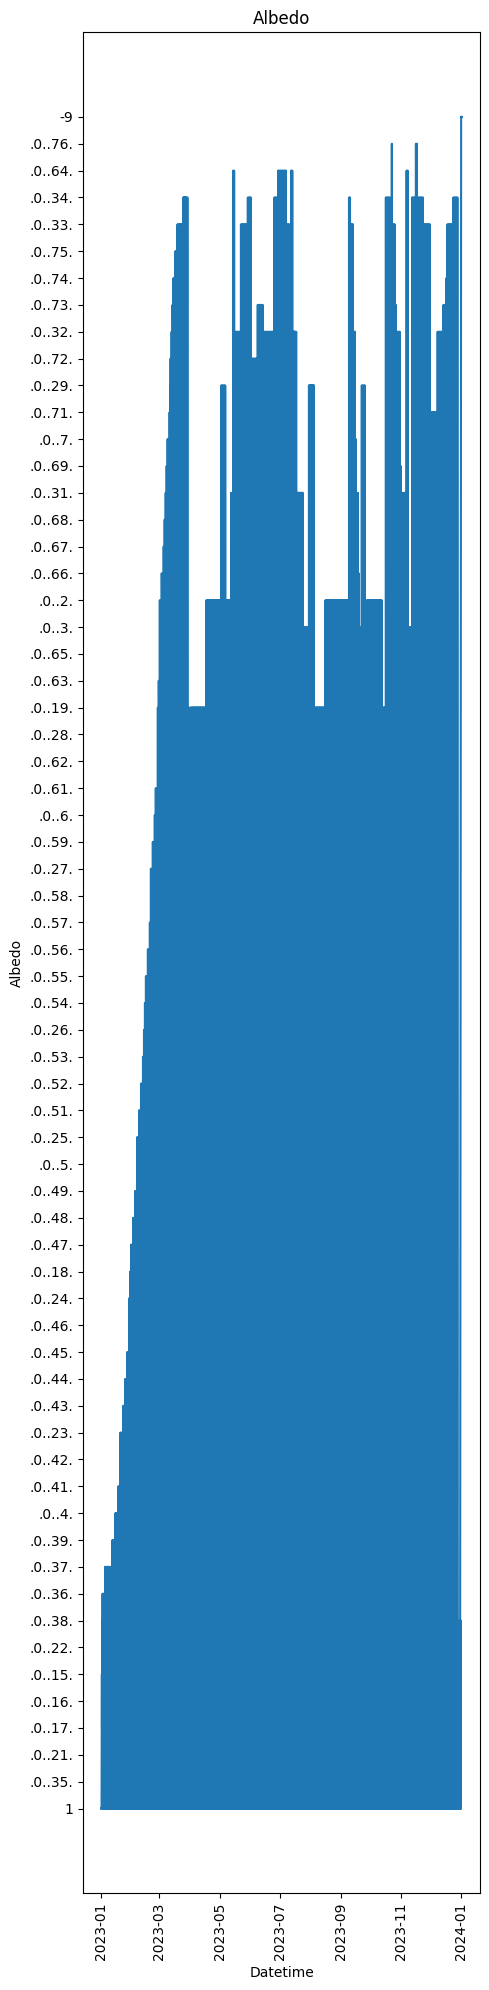

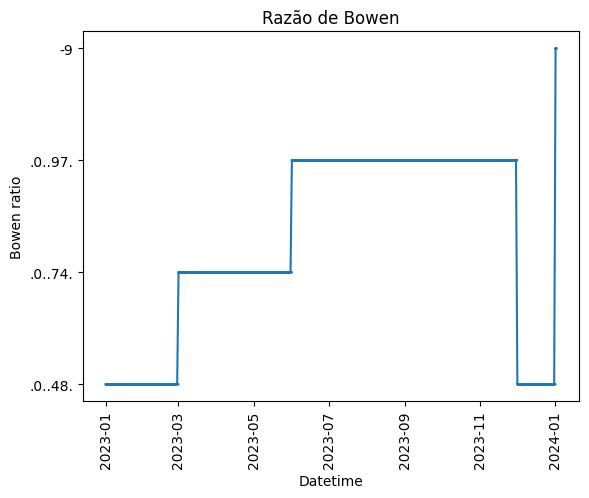

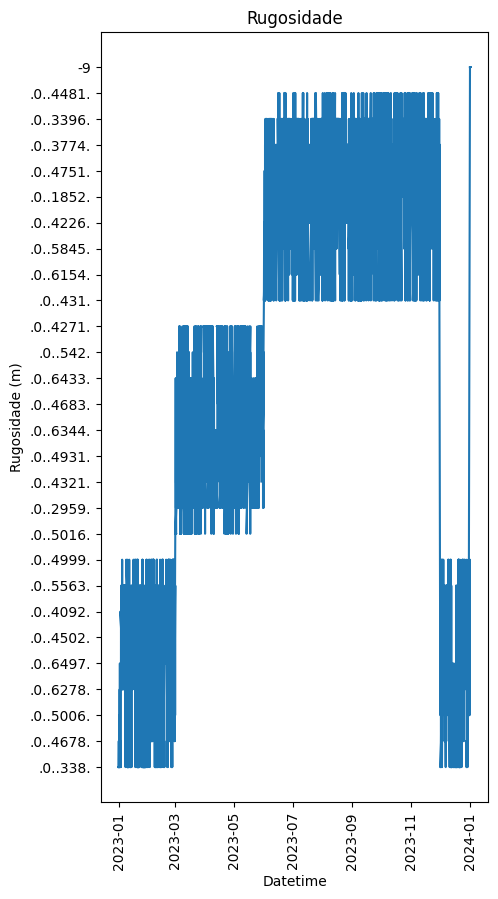

In [36]:
import pandas as pd
import matplotlib.pyplot as plot
# função para converter os dados de tempo 
def convert_year(two_digit_year):
    return 2000 + two_digit_year
def adjust_hours(hour):
    if hour == 24:
        return 0
    return hour
# criação da coluna datetime aplicando as funções acima para que o df fique organizado com a data correta
df['datetime'] = pd.to_datetime(df.apply(lambda row: f"{convert_year(row['year'])}-{row['month']:02d}-{row['day']:02d} {adjust_hours(row['hour']):02d}:00", axis=1))
# plot dos dados "albedo"
plot.figure(figsize=(5, 20))
plot.plot(df['datetime'], df['albedo'])
plot.xlabel('Datetime')
plot.ylabel('Albedo')
plot.title('Albedo')
plot.xticks(rotation=90)
plot.tight_layout()
plot.show()
# plot dos dados de Bowen
plot.plot(df['datetime'], df['Bowen ratio'])
plot.xlabel('Datetime')
plot.ylabel('Bowen ratio')
plot.title('Razão de Bowen')
plot.xticks(rotation=90)
plot.show()
# plot dos dados de rugosidade
plot.figure(figsize=(5, 10))
plot.plot(df['datetime'], df['surface roughness length (m)'])
plot.xlabel('Datetime')
plot.ylabel('Rugosidade (m)')
plot.title('Rugosidade')
plot.xticks(rotation=90)
plot.show()

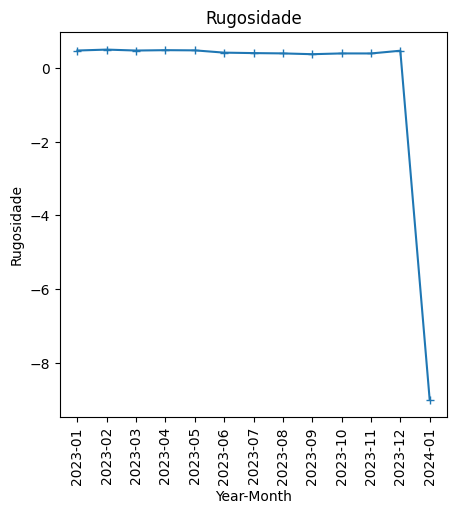

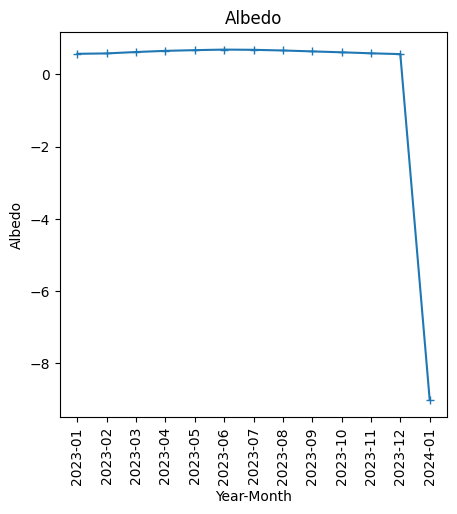

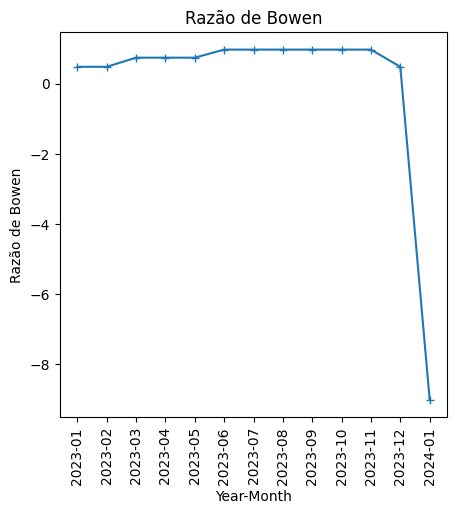

In [11]:
# cálculo da média da turbulência e altura da camada limite
import pandas as pd
import matplotlib.pyplot as plot
# Abrindo os arquivos
file_path = r'C:\UFSC\ENS410064\venv\Scripts\inputs\aermod\METEO_.xltx'
df = pd.read_excel(file_path)
# função para converter os dados de tempo 
def convert_year(two_digit_year):
    return 2000 + two_digit_year
def adjust_hours(hour):
    if hour == 24:
        return 0
    return hour
# criação da coluna datetime aplicando as funções acima para que o df fique organizado com a data correta
df['datetime'] = pd.to_datetime(df.apply(lambda row: f"{convert_year(row['year'])}-{row['month']:02d}-{row['day']:02d} {adjust_hours(row['hour']):02d}:00", axis=1))

# Convertendo a coluna datetime para o tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Criando uma nova coluna para o ano e mês
df['year_month'] = df['datetime'].dt.to_period('M')

# Selecionando apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Adicionando a coluna year_month de volta ao DataFrame numérico
df_numeric['year_month'] = df['year_month']

# Calculando a média mensal
monthly_means = df_numeric.groupby('year_month').mean()

# plot das 3 variáveis"
plot.figure(figsize=(5, 5))
plot.plot(monthly_means.index.astype(str), monthly_means['surface roughness length (m)'], marker='+', linestyle='-')
plot.xlabel('Year-Month')
plot.ylabel('Rugosidade')
plot.title('Rugosidade')
plot.xticks(rotation=90)
plot.show()
plot.figure(figsize=(5, 5))
plot.plot(monthly_means.index.astype(str), monthly_means['albedo'], marker='+', linestyle='-')
plot.xlabel('Year-Month')
plot.ylabel('Albedo')
plot.title('Albedo')
plot.xticks(rotation=90)
plot.show()
plot.figure(figsize=(5, 5))
plot.plot(monthly_means.index.astype(str), monthly_means['Bowen ratio'], marker='+', linestyle='-')
plot.xlabel('Year-Month')
plot.ylabel('Razão de Bowen')
plot.title('Razão de Bowen')
plot.xticks(rotation=90)
plot.show()

In [7]:
# quadrantes do vento para gráficos de albedo, rugosidade e razão de Bowen
import pandas as pd
import numpy as np

# Abrindo os arquivos
file_path = r'C:\UFSC\ENS410064\venv\Scripts\inputs\aermod\METEO_.xltx'
df = pd.read_excel(file_path)

# filtragem dos valores de vento
df_novo = df[df['wind direction (m/s degress)'] != 999]

# quadrantes
quadranteLIM = [(0, 90), (90, 180), (180, 270), (270, 360)]

# parâmtros
albedo = []
bowen = []
rugosidade = []

# Iterar sobre os quadrantes de vento
for low, up in quadranteLIM:
    # apenas valores dentro do intervalo
    quadrantes = df[(df['wind direction (m/s degress)'] >= low) & (df['wind direction (m/s degress)'] < up)]
    
    # médias por quadrante
    albedo1 = quadrantes['albedo'].mean()
    bowen1 = quadrantes['Bowen ratio'].mean()
    rugosidade1 = quadrantes['surface roughness length (m)'].mean()
    
    # adicionando as listas
    albedo.append(albedo1)
    bowen.append(bowen1)
    rugosidade.append(rugosidade1)

# print por quadrante
for i, (low, up) in enumerate(quadranteLIM):
    print(f"Quadrante {i+1} (Intervalo de Wind Direction: {low}° a {up}°):")
    print(f"Albedo: {albedo[i]}")
    print(f"Razão de Bowen: {bowen[i]}")
    print(f"Rugosidade: {rugosidade[i]}")
    print()

Quadrante 1 (Intervalo de Wind Direction: 0° a 90°):
Albedo: 0.6922701383238404
Razão de Bowen: 0.7648982912937347
Rugosidade: 0.3333764035801465

Quadrante 2 (Intervalo de Wind Direction: 90° a 180°):
Albedo: 0.6579042501221299
Razão de Bowen: 0.7839325842696631
Rugosidade: 0.4476597948216903

Quadrante 3 (Intervalo de Wind Direction: 180° a 270°):
Albedo: 0.6431550480769231
Razão de Bowen: 0.7836778846153846
Rugosidade: 0.49687776442307696

Quadrante 4 (Intervalo de Wind Direction: 270° a 360°):
Albedo: 0.5637650513950073
Razão de Bowen: 0.8073480176211455
Rugosidade: 0.4556210866372981



### Rosa dos Ventos

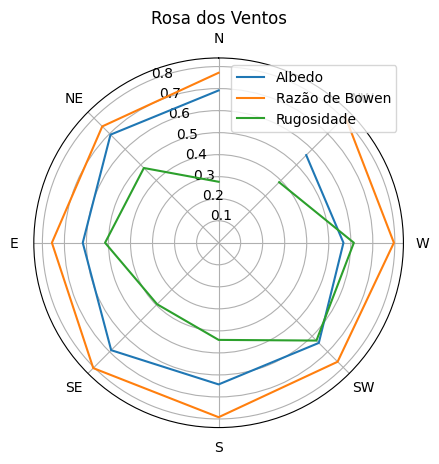

Octante N:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.77
Média de Rugosidade (m): 0.28

Octante NE:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.75
Média de Rugosidade (m): 0.48

Octante E:
Média de Albedo: 0.62
Média de Razão de Bowen: 0.76
Média de Rugosidade (m): 0.52

Octante SE:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.80
Média de Rugosidade (m): 0.39

Octante S:
Média de Albedo: 0.64
Média de Razão de Bowen: 0.79
Média de Rugosidade (m): 0.44

Octante SW:
Média de Albedo: 0.64
Média de Razão de Bowen: 0.76
Média de Rugosidade (m): 0.63

Octante W:
Média de Albedo: 0.57
Média de Razão de Bowen: 0.80
Média de Rugosidade (m): 0.61

Octante NW:
Média de Albedo: 0.56
Média de Razão de Bowen: 0.81
Média de Rugosidade (m): 0.39



In [18]:
#a lógica dessa etapa é similar à anterior só que ao invés de quadrantes foi feita para octantes
#imports
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

# Abrindo os arquivos
file_path = r'C:\UFSC\ENS410064\venv\Scripts\inputs\aermod\METEO_.xltx'
df = pd.read_excel(file_path)

#filtragem
df = df[df['wind direction (m/s degress)'] != 999]
#octantes
octantLIM = [(0, 45), (45, 90), (90, 135), (135, 180), (180, 225), (225, 270), (270, 315), (315, 360)]
#armazenagem
albedo=[]
bowen=[]
rugosidade=[]
#iteração
for low, up in octantLIM:
    octante = df[(df['wind direction (m/s degress)'] >= low) & (df['wind direction (m/s degress)'] < up)]
    #media
    albedo1 = octante['albedo'].mean()
    bowen1 = octante['Bowen ratio'].mean()
    rugosidade1 = octante['surface roughness length (m)'].mean()
    albedo.append(albedo1)
    bowen.append(bowen1)
    rugosidade.append(rugosidade1)

#labels
labels=['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
ang = np.radians([0, 45, 90, 135, 180, 225, 270, 315])

# plot
fig, ax = plot.subplots(subplot_kw={'projection': 'polar'})
ax.plot(ang, albedo, label='Albedo')
ax.plot(ang, bowen, label='Razão de Bowen')
ax.plot(ang, rugosidade, label='Rugosidade')
#configurações para plot
ax.grid(True)
ax.legend(loc='upper right')
ax.set_xticks(ang)
ax.set_xticklabels(labels)
ax.set_theta_zero_location('N')
ax.set_title('Rosa dos Ventos')
plot.show()
#repetição
for i, (label, albedo1, bowen1, rugosidade1) in enumerate(zip(labels, albedo, bowen, rugosidade)):
    print(f'Octante {label}:')
    print(f'Média de Albedo: {albedo1:.2f}')
    print(f'Média de Razão de Bowen: {bowen1:.2f}')
    print(f'Média de Rugosidade (m): {rugosidade1:.2f}')
    print()